# Step 5: Investigate badly fit halo
From the previous step find a halo that was not well fit by the NFW profile and plot its contents.

In [1]:
# In this case we use halo with
haloid=78000115000000

In [2]:
import SciServer.CasJobs as cj
import pandas
import tables
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
%%time
queryString = f"""
select top 100000 p.x-hh.x as x,p.y-hh.y as y,p.z-hh.z as z
from mpahalotrees.mr hh
   cross apply dbo.MillenniumParticles(hh.snapnum,
     dbo.Sphere::New(hh.x,hh.y,hh.z,1).ToString()) p
  where hh.haloid={haloid} order by newid()
     """
df = cj.executeQuery(queryString, context="SimulationDB")


CPU times: user 398 ms, sys: 117 ms, total: 515 ms
Wall time: 4.32 s


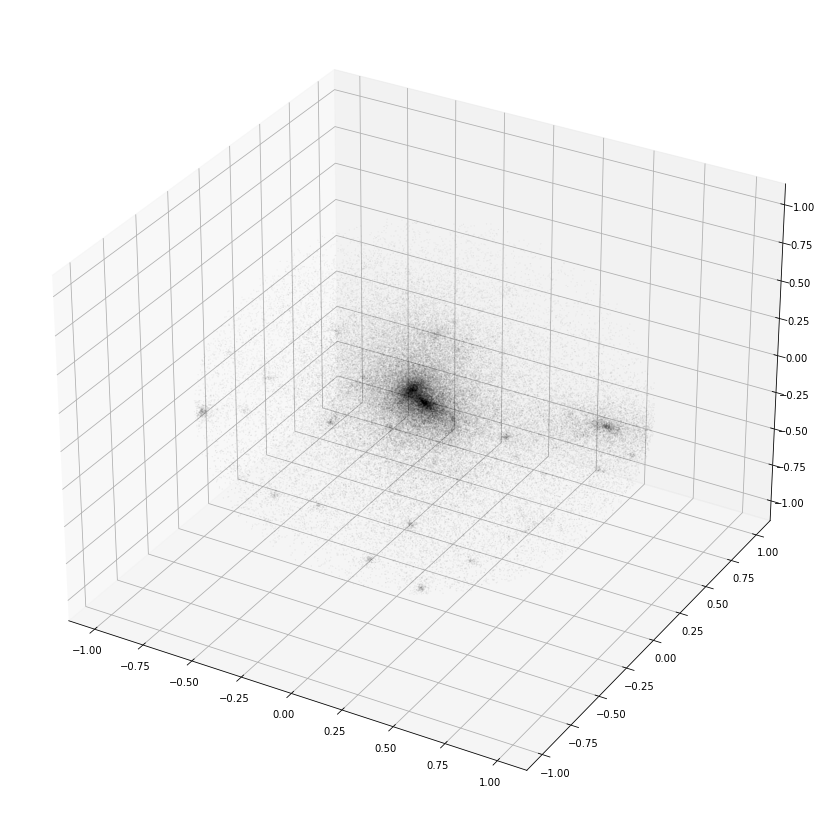

In [4]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.x,df.y, df.z,s=0.001,c='black');